In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SIGINT Analysis in Python

*Tags: Inteliigence, NLP, Signals, COMINT, ELINT, Radar*

## Contents
1. Data Overview and Exploration
    - What type of signals did we receive?
    - What source and targets are most active?
2. Identify Entities
    - What entities are communicating
    - What is the relationship between entities
3. Message Prioritization
    - What is the sentiment of each message
    - Do any keywords exist in messages
    - Do any strange patterns exist
4. Concluding Analysis


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Signal ID,Signal Type,Frequency,Modulation,Encryption,Source,Destination,Content
0,S1,COMINT,2.4 GHz,FM,RSA,A1,A2,“Alpha Two sitrep?”
1,S2,ELINT,10 GHz,AM,NaN,R1,-,Radar pulse
2,S3,COMINT,5 GHz,QPSK,AES,B1,B2,"“Bravo One to Bravo Two, we have a target in s..."
3,S4,ELINT,15 GHz,FSK,NaN,R2,-,Radar sweep
4,S5,COMINT,3 GHz,PSK,RSA,C1,A1,"“Charlie One to Alpha One, we are under attack!”"


In [17]:
df.describe()

,Signal ID,Signal Type,Frequency,Modulation,Encryption,Source,Destination,Content
count,35,35,35,35,35,35,21,35
unique,35,2,21,10,6,21,9,28
top,S1,ELINT,2.4 GHz,QAM,Unencrypted,A1,A1,Radar chirp
freq,1,18,6,7,21,3,5,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Signal ID    35 non-null     object
 1   Signal Type  35 non-null     object
 2   Frequency    35 non-null     object
 3   Modulation   35 non-null     object
 4   Encryption   35 non-null     object
 5   Source       35 non-null     object
 6   Destination  21 non-null     object
 7   Content      35 non-null     object
dtypes: object(8)
memory usage: 2.3+ KB


In [13]:
#data prep

#replace NaN values in Encryption column with the value 'Unencrypted'
df.Encryption = df['Encryption'].fillna("Unencrypted")

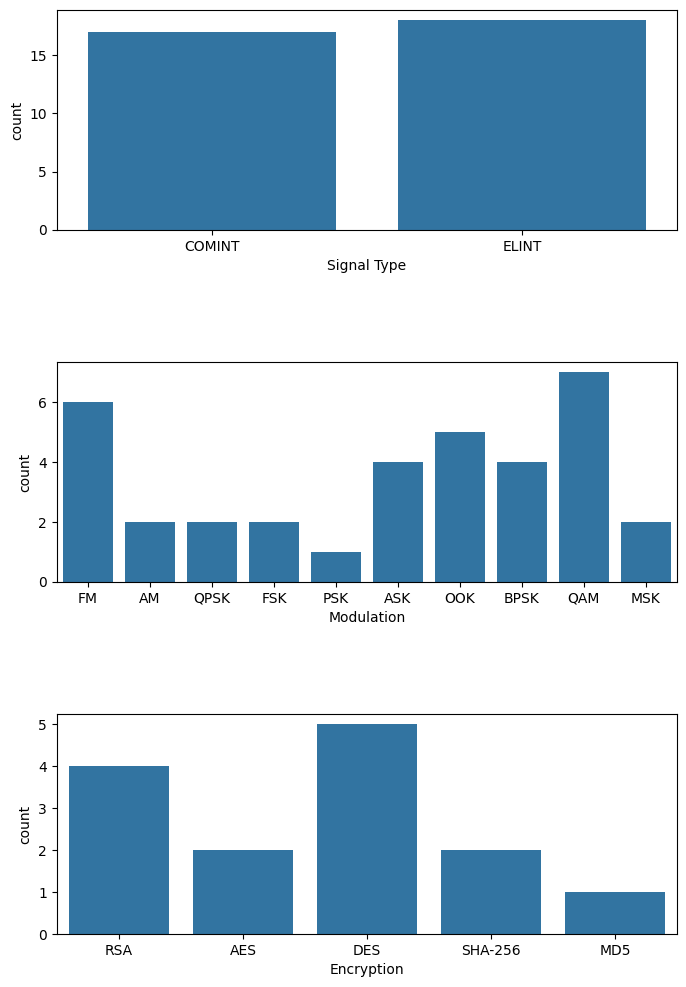

In [12]:
# visualize the signal types and encryption types present in the data.
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8,12))

# get count by Signal Type
sns.countplot(data = df, x='Signal Type', ax=axes[0])

# get count by Modulation
sns.countplot(data = df, x='Modulation', ax=axes[1])

# get count by Encryption type
sns.countplot(data = df, x='Encryption', ax=axes[2])

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()


Analysis:
- About half our signals are COMINT messages and half are ELINT
- There is a wide range of modulation types but QAM makes up the majority followed by FM
- DES encryption is most common followed by RSA. There is also one MD5 encrypted message.